In [1]:
!pip install tensorflow

In [2]:
!pip install kagglehub


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
import tensorflow as tf
from tensorflow.keras import layers, models
import glob
import os
import pandas as pd
from tqdm import tqdm
import random
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import kagglehub

# Download latest version
path = kagglehub.dataset_download("emmarex/plantdisease")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\nstib\.cache\kagglehub\datasets\emmarex\plantdisease\versions\1


In [7]:
data_dir = 'C:/Users/nstib/.cache/kagglehub/datasets/emmarex/plantdisease/versions/1'

categories = os.listdir(data_dir)
print("Classes:", categories)

data_dir = 'C:/Users/nstib/.cache/kagglehub/datasets/emmarex/plantdisease/versions/1'  # adjust if needed

batch_size = 64
img_height = 150
img_width = 150
seed = 123

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=True)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False)

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

num_classes = len(categories)

model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    # First Convolutional Block
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Second Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Third Convolutional Block
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Fourth Convolutional Block
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Dense Layers
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Classes: ['PlantVillage']
Found 41276 files belonging to 1 classes.
Using 33021 files for training.
Found 41276 files belonging to 1 classes.
Using 8255 files for validation.


C:\Users\nstib\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
import os
import cv2
from tqdm import tqdm

data_dir = "C:/Users/nstib/.cache/kagglehub/datasets/emmarex/plantdisease/versions/1"
img_size = 128

categories = os.listdir(os.path.join(data_dir, "PlantVillage"))
print("Classes:", categories)

data = []
labels = []

for i, category in tqdm(enumerate(categories)):
    folder_path = os.path.join(data_dir, "PlantVillage", category)
    for img in os.listdir(folder_path):
        try:
            img_path = os.path.join(folder_path, img)
            img_arr = cv2.imread(img_path)
            img_arr = cv2.resize(img_arr, (img_size, img_size))
            data.append(img_arr)
            labels.append(i)
        except Exception as e:
            pass  # Skip unreadable images

print("Total images:", len(data))


Classes: ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'PlantVillage', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_healthy', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_YellowLeaf__Curl_Virus']


16it [00:12,  1.27it/s]

Total images: 20638


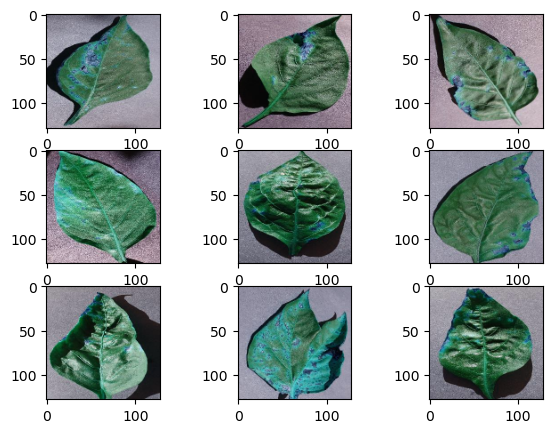

In [11]:
fig, axs = plt.subplots(3, 3, figsize = (7, 5))
cnt = 0
for i in range(3):
     for j in range(3):
         axs[i, j].imshow(data[cnt])
         cnt += 1

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image size and batch size
img_size = 128
batch_size = 32

# Path to the "PlantVillage" folder that contains subfolders for each class
train_dir = "C:/Users/nstib/.cache/kagglehub/datasets/emmarex/plantdisease/versions/1"

# Create ImageDataGenerator for training and validation
datagen = ImageDataGenerator(
    rescale=1./255,           # Normalize pixel values
    validation_split=0.2      # Use 20% of data for validation
)

# Load images directly from directory in batches
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


Found 33021 images belonging to 1 classes.
Found 8255 images belonging to 1 classes.


In [15]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(15, activation= 'softmax'))
model.summary()

C:\Users\nstib\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │       1,605,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 15)                  │             975 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,699,919 (6.48 MB)

 Trainable params: 1,699,919 (6.48 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model using generators
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    verbose=1
)

# Evaluate model on validation set
val_loss, val_acc = model.evaluate(val_generator)
print(f"\nValidation Accuracy: {val_acc:.4f}, Validation Loss: {val_loss:.4f}")


Epoch 1/50


C:\Users\nstib\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1032/1032 ━━━━━━━━━━━━━━━━━━━━ 192s 185ms/step - accuracy: 0.9927 - loss: 0.0228 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/50
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 179s 173ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/50
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 178s 172ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/50
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 180s 174ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/50
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 183s 178ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/50
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 174s 169ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/50
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 167s 162ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/50
1032/1032 

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


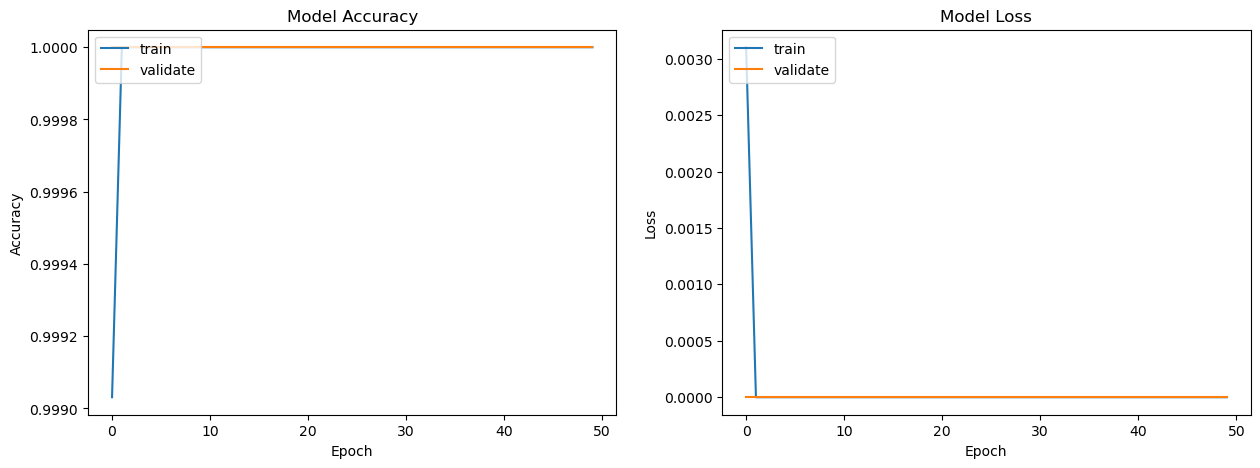


 Final Training Metrics:
• Training Accuracy: 100.00%
• Validation Accuracy: 100.00%
• Training Loss: 0.00%
• Validation Loss: 0.00%


In [251]:
def plotmodelhistory(history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy'])
    axs[0].plot(history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss'])
    axs[1].plot(history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# # list all data in history
print(history.history.keys())

plotmodelhistory(history)

final_train_acc = history.history['accuracy'][-1] * 100
final_val_acc = history.history['val_accuracy'][-1] * 100
final_train_loss = history.history['loss'][-1] * 100
final_val_loss = history.history['val_loss'][-1] * 100

print("\n Final Training Metrics:")
print(f"• Training Accuracy: {final_train_acc:.2f}%")
print(f"• Validation Accuracy: {final_val_acc:.2f}%")
print(f"• Training Loss: {final_train_loss:.2f}%") 
print(f"• Validation Loss: {final_val_loss:.2f}%")


In [253]:
# Mapping of class indices to class names
class_indices = train_generator.class_indices
# Invert the dictionary to get labels from indices
class_labels = {v: k for k, v in class_indices.items()}
print(class_labels)


{0: 'Pepper__bell___Bacterial_spot', 1: 'Pepper__bell___healthy', 2: 'PlantVillage', 3: 'Potato___Early_blight', 4: 'Potato___Late_blight', 5: 'Potato___healthy', 6: 'Tomato_Bacterial_spot', 7: 'Tomato_Early_blight', 8: 'Tomato_Late_blight', 9: 'Tomato_Leaf_Mold', 10: 'Tomato_Septoria_leaf_spot', 11: 'Tomato_Spider_mites_Two_spotted_spider_mite', 12: 'Tomato__Target_Spot', 13: 'Tomato__Tomato_YellowLeaf__Curl_Virus', 14: 'Tomato__Tomato_mosaic_virus', 15: 'Tomato_healthy'}


In [255]:
from tensorflow.keras.preprocessing import image
import numpy as np

def prepare_image(img_path):
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize
    return img_array


In [257]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Prepare the image
def prepare_image(img_path):
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

# Reverse class indices
class_labels = {v: k for k, v in train_generator.class_indices.items()}

# Load and predict
img_path = "C:/Users/nstib/Desktop/final Project 2025/PlantVillage/Potato___Early_blight/0a0744dc-8486-4fbb-a44b-4d63e6db6197___RS_Early.B 7575.JPG" # replace this
img_array = prepare_image(img_path)
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions[0])

# Safety check
print("Predicted index:", predicted_class_index)
print("Available class label keys:", class_labels.keys())

# Get class name
predicted_class_name = class_labels.get(predicted_class_index, "Unknown class")
confidence = predictions[0][predicted_class_index]

print(f"✅ Predicted Class: {predicted_class_name} ({confidence * 100:.2f}%)")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Predicted index: 10
Available class label keys: dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
✅ Predicted Class: Tomato_Septoria_leaf_spot (10.55%)


In [247]:
class_labels = list(train_generator.class_indices.keys())


In [59]:
print(f"Number of class labels: {len(class_labels)}")
print("Class labels:", class_labels)


Number of class labels: 1
Class labels: ['PlantVillage']


In [104]:
# categories is train_generator.class_indices, a dict {class_name: index}
idx_to_class = {v: k for k, v in categories.items()}


In [110]:
train_dir = "C:/Users/nstib/.cache/kagglehub/datasets/emmarex/plantdisease/versions/1/PlantVillage"


In [199]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

categories = train_generator.class_indices
idx_to_class = {v: k for k, v in categories.items()}
print("Class indices:", categories)
print("idx_to_class:", idx_to_class)


Found 33027 images belonging to 16 classes.
Found 8249 images belonging to 16 classes.
Class indices: {'Pepper__bell___Bacterial_spot': 0, 'Pepper__bell___healthy': 1, 'PlantVillage': 2, 'Potato___Early_blight': 3, 'Potato___Late_blight': 4, 'Potato___healthy': 5, 'Tomato_Bacterial_spot': 6, 'Tomato_Early_blight': 7, 'Tomato_Late_blight': 8, 'Tomato_Leaf_Mold': 9, 'Tomato_Septoria_leaf_spot': 10, 'Tomato_Spider_mites_Two_spotted_spider_mite': 11, 'Tomato__Target_Spot': 12, 'Tomato__Tomato_YellowLeaf__Curl_Virus': 13, 'Tomato__Tomato_mosaic_virus': 14, 'Tomato_healthy': 15}
idx_to_class: {0: 'Pepper__bell___Bacterial_spot', 1: 'Pepper__bell___healthy', 2: 'PlantVillage', 3: 'Potato___Early_blight', 4: 'Potato___Late_blight', 5: 'Potato___healthy', 6: 'Tomato_Bacterial_spot', 7: 'Tomato_Early_blight', 8: 'Tomato_Late_blight', 9: 'Tomato_Leaf_Mold', 10: 'Tomato_Septoria_leaf_spot', 11: 'Tomato_Spider_mites_Two_spotted_spider_mite', 12: 'Tomato__Target_Spot', 13: 'Tomato__Tomato_YellowLeaf

In [215]:
# print(idx_to_class)
idx_to_class = {
    0: 'Pepper__bell___Bacterial_spot',
    1: 'Pepper__bell___healthy',
    2: 'PlantVillage',
    3: 'Potato___Early_blight',
    4: 'Potato___Late_blight',
    5: 'Potato___healthy', 
    6: 'Tomato_Bacterial_spot', 
    7: 'Tomato_Early_blight', 
    8: 'Tomato_Late_blight', 
    9: 'Tomato_Leaf_Mold', 
    10: 'Tomato_Septoria_leaf_spot', 
    11: 'Tomato_Spider_mites_Two_spotted_spider_mite', 
    12: 'Tomato__Target_Spot', 
    13: 'Tomato__Tomato_YellowLeaf__Curl_Virus', 
    14: 'Tomato__Tomato_mosaic_virus', 
    15: 'Tomato_healthy'
}


In [217]:
suggested_actions = {
    'Pepper__bell___Bacterial_spot': "Use copper-based bactericides; avoid overhead irrigation; remove infected leaves.",
    'Pepper__bell___healthy': "Plant looks healthy! Maintain good watering and nutrient practices.",
    'PlantVillage': "This is a dataset folder name, no action needed.",
    'Potato___Early_blight': "Apply fungicides containing chlorothalonil; remove infected foliage.",
    'Potato___Late_blight': "Use fungicides such as chlorothalonil or mancozeb; remove infected plants promptly.",
    'Potato___healthy': "Plant is healthy; continue regular care.",
    'Tomato_Bacterial_spot': "Apply copper-based bactericides; remove infected leaves; avoid overhead watering.",
    'Tomato_Early_blight': "Use fungicides containing chlorothalonil; prune affected leaves.",
    'Tomato_Late_blight': "Apply fungicides promptly; ensure good field drainage.",
    'Tomato_Leaf_Mold': "Use fungicides; improve air circulation around plants.",
    'Tomato_Septoria_leaf_spot': "Apply fungicides like chlorothalonil; practice crop rotation.",
    'Tomato_Spider_mites_Two_spotted_spider_mite': "Use miticides; introduce predatory mites; maintain humidity.",
    'Tomato__Target_Spot': "Apply appropriate fungicides; remove infected leaves.",
    'Tomato__Tomato_YellowLeaf__Curl_Virus': "Remove infected plants; control whitefly vectors.",
    'Tomato__Tomato_mosaic_virus': "Remove infected plants; sanitize tools and hands regularly.",
    'Tomato_healthy': "Plant is healthy; continue regular care and monitoring."
}


In [219]:
image_path = "C:/Users/nstib/Desktop/final Project 2025/PlantVillage/Potato___Early_blight/0a0744dc-8486-4fbb-a44b-4d63e6db6197___RS_Early.B 7575.JPG"

# Assuming you already have your trained model, idx_to_class dictionary, and suggested_actions dict

predict_image(image_path, model, idx_to_class, suggested_actions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
✅ Prediction: Tomato_Septoria_leaf_spot
🔍 Confidence: 10.55%
🧑‍🌾 Suggested Action: Apply fungicides like chlorothalonil; practice crop rotation.


('Tomato_Septoria_leaf_spot',
 10.55038869380951,
 'Apply fungicides like chlorothalonil; practice crop rotation.')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


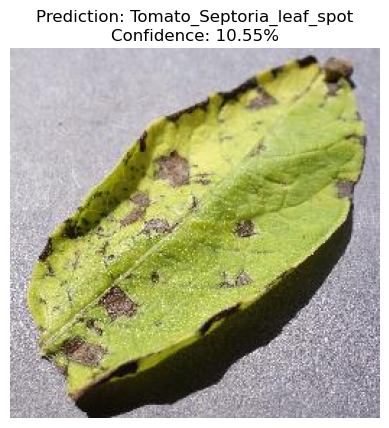

Prediction is Tomato_Septoria_leaf_spot with confidence 10.6 percent. Suggested action: Apply fungicides like chlorothalonil; practice crop rotation.


('Tomato_Septoria_leaf_spot',
 10.55038869380951,
 'Apply fungicides like chlorothalonil; practice crop rotation.')

In [221]:
image_path = "C:/Users/nstib/Desktop/final Project 2025/PlantVillage/Potato___Early_blight/0a0744dc-8486-4fbb-a44b-4d63e6db6197___RS_Early.B 7575.JPG"
predict_image_with_voice(image_path, model, idx_to_class, suggested_actions)


In [222]:
# After creating the generator:
class_indices = train_generator.class_indices
import numpy as np
np.save("class_indices.npy", class_indices)
print("Saved class indices:", class_indices)


Saved class indices: {'Pepper__bell___Bacterial_spot': 0, 'Pepper__bell___healthy': 1, 'PlantVillage': 2, 'Potato___Early_blight': 3, 'Potato___Late_blight': 4, 'Potato___healthy': 5, 'Tomato_Bacterial_spot': 6, 'Tomato_Early_blight': 7, 'Tomato_Late_blight': 8, 'Tomato_Leaf_Mold': 9, 'Tomato_Septoria_leaf_spot': 10, 'Tomato_Spider_mites_Two_spotted_spider_mite': 11, 'Tomato__Target_Spot': 12, 'Tomato__Tomato_YellowLeaf__Curl_Virus': 13, 'Tomato__Tomato_mosaic_virus': 14, 'Tomato_healthy': 15}


In [223]:
import cv2
import numpy as np

def predict_image(image_path, model, idx_to_class, suggested_actions, img_size=128):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (img_size, img_size))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) / 255.0
    img_input = np.expand_dims(img, axis=0)

    preds = model.predict(img_input)[0]
    pred_idx = np.argmax(preds)
    pred_class = idx_to_class[pred_idx]
    confidence = preds[pred_idx] * 100
    action = suggested_actions.get(pred_class, "No suggestion available.")

    print("Raw probabilities:", preds)
    print(f"✅ Prediction: {pred_class}")
    print(f"🔍 Confidence: {confidence:.2f}%")
    print(f"🧑‍🌾 Suggested Action: {action}")
    return pred_class, confidence, action

# Example usage
predict_image(image_path, model, idx_to_class, suggested_actions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Raw probabilities: [0.06734708 0.05386456 0.04809788 0.05796494 0.09907908 0.05829928
 0.05769465 0.05897528 0.06710632 0.0688317  0.10550389 0.05935364
 0.04972948 0.08690679 0.06124539]
✅ Prediction: Tomato_Septoria_leaf_spot
🔍 Confidence: 10.55%
🧑‍🌾 Suggested Action: Apply fungicides like chlorothalonil; practice crop rotation.


('Tomato_Septoria_leaf_spot',
 10.55038869380951,
 'Apply fungicides like chlorothalonil; practice crop rotation.')

In [228]:
np.save("class_indices.npy", train_generator.class_indices)


In [231]:
class_indices = np.load("class_indices.npy", allow_pickle=True).item()
idx_to_class = {v: k for k, v in class_indices.items()}


In [235]:
import cv2
import numpy as np

def top3_predictions(image_path, model, idx_to_class, img_size=128):
    # Load and preprocess image
    img = cv2.imread(image_path)
    img = cv2.resize(img, (img_size, img_size))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img / 255.0
    img_input = np.expand_dims(img, axis=0)

    # Predict
    preds = model.predict(img_input)[0]

    # Get top 3 indices
    top3 = preds.argsort()[-3:][::-1]

    print("Top 3 predictions:")
    for i in top3:
        label = idx_to_class.get(i, f"Unknown class {i}")
        confidence = preds[i] * 100
        print(f"{label}: {confidence:.2f}%")

# Example usage
image_path = "C:/Users/nstib/Desktop/final Project 2025/PlantVillage/Potato___Early_blight/0a0744dc-8486-4fbb-a44b-4d63e6db6197___RS_Early.B 7575.JPG"
top3_predictions(image_path, model, idx_to_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Top 3 predictions:
Tomato_Septoria_leaf_spot: 10.55%
Potato___Late_blight: 9.91%
Tomato__Tomato_YellowLeaf__Curl_Virus: 8.69%


In [263]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Prepare the image
def prepare_image(img_path):
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

# Reverse class indices
class_labels = {v: k for k, v in train_generator.class_indices.items()}

# Image path
img_path = "C:/Users/nstib/Desktop/final Project 2025/PlantVillage/Potato___Early_blight/0a0744dc-8486-4fbb-a44b-4d63e6db6197___RS_Early.B 7575.JPG"

# Load and preprocess image
img_array = prepare_image(img_path)

# Predict
predictions = model.predict(img_array)
top_indices = predictions[0].argsort()[-3:][::-1]  # Top 3 indices
threshold = 0.5  # 50% confidence threshold

print("🔍 Top 3 Predictions:")
for i in top_indices:
    print(f"{class_labels[i]}: {predictions[0][i]*100:.2f}%")

# Best prediction
predicted_class_index = top_indices[0]
confidence = predictions[0][predicted_class_index]
predicted_class_name = class_labels.get(predicted_class_index, "Unknown class")

# Final decision based on confidence threshold
if confidence >= threshold:
    print(f"\n✅ Predicted Class: {predicted_class_name} ({confidence * 100:.2f}%)")
else:
    print(f"\n❌ Model is unsure.")
    print(f"Top prediction: {predicted_class_name} ({confidence * 100:.2f}%)")
    print("⚠️ You may want to retrain or improve your model.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
🔍 Top 3 Predictions:
Tomato_Septoria_leaf_spot: 10.55%
Potato___Late_blight: 9.91%
Tomato__Tomato_YellowLeaf__Curl_Virus: 8.69%

❌ Model is unsure.
Top prediction: Tomato_Septoria_leaf_spot (10.55%)
⚠️ You may want to retrain or improve your model.


In [261]:
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions[0])
predicted_class_name = class_labels.get(predicted_class_index, "Unknown class")
confidence = predictions[0][predicted_class_index]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [265]:
loss='sparse_categorical_crossentropy'


In [267]:
class_mode='categorical'


In [269]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [271]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

base_model = MobileNetV2(input_shape=(128, 128, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze base

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [273]:
history = model.fit(train_generator, validation_data=val_generator, epochs=10)


Epoch 1/10


C:\Users\nstib\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1033/1033 ━━━━━━━━━━━━━━━━━━━━ 184s 174ms/step - accuracy: 0.5101 - loss: 1.4435 - val_accuracy: 0.2043 - val_loss: 3.0484
Epoch 2/10
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 173s 167ms/step - accuracy: 0.5516 - loss: 1.0119 - val_accuracy: 0.1755 - val_loss: 3.8770
Epoch 3/10
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 169s 164ms/step - accuracy: 0.5542 - loss: 0.9625 - val_accuracy: 0.1803 - val_loss: 4.0058
Epoch 4/10
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 169s 164ms/step - accuracy: 0.5584 - loss: 0.9421 - val_accuracy: 0.1975 - val_loss: 4.1867
Epoch 5/10
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 168s 163ms/step - accuracy: 0.5587 - loss: 0.9086 - val_accuracy: 0.1658 - val_loss: 5.0378
Epoch 6/10
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 168s 163ms/step - accuracy: 0.5628 - loss: 0.9046 - val_accuracy: 0.2269 - val_loss: 6.5156
Epoch 7/10
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 170s 165ms/step - accuracy: 0.5624 - loss: 0.8880 - val_accuracy: 0.1470 - val_loss: 5.7395
Epoch 8/10
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 192s 186ms/step - accuracy: 0.5

In [275]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [278]:
from collections import Counter
print(Counter(train_generator.classes))


Counter({2: 16511, 13: 2567, 6: 1702, 8: 1528, 10: 1417, 11: 1341, 15: 1273, 1: 1183, 12: 1124, 3: 800, 4: 800, 7: 800, 0: 798, 9: 762, 14: 299, 5: 122})


In [282]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)


In [284]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
from sklearn.utils import class_weight
from collections import Counter
import os

# Basic config
img_size = 128
batch_size = 32
train_dir = "C:/Users/nstib/.cache/kagglehub/datasets/emmarex/plantdisease/versions/1/PlantVillage"

# Data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


Found 33027 images belonging to 16 classes.
Found 8249 images belonging to 16 classes.


In [286]:
base_model = MobileNetV2(input_shape=(img_size, img_size, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze base model

# Add custom head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# Compile with correct loss
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "functional_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)    │ (None, 128, 128, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 64, 64, 32)        │             864 │ input_layer_3[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 64, 64, 32)        │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 64, 64, 32)        │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 64, 64, 32)        │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 64, 64, 32)        │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 64, 64, 32)        │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 64, 64, 16)        │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 64, 64, 16)        │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 64, 64, 96)        │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 64, 64, 96)        │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 64, 64, 96)        │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 65, 65, 96)        │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 32, 32, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,424,016 (9.25 MB)

 Trainable params: 166,032 (648.56 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [288]:
# Optional: compute class weights
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights_dict = dict(enumerate(class_weights))


In [290]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,  # You can increase this
    class_weight=class_weights_dict,  # remove if not using
    verbose=1
)


C:\Users\nstib\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 267s 255ms/step - accuracy: 0.1367 - loss: 2.6484 - val_accuracy: 0.3316 - val_loss: 2.8208
Epoch 2/10
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 262s 254ms/step - accuracy: 0.2960 - loss: 1.5490 - val_accuracy: 0.3703 - val_loss: 3.1021
Epoch 3/10
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 260s 252ms/step - accuracy: 0.3299 - loss: 1.3019 - val_accuracy: 0.3716 - val_loss: 3.2245
Epoch 4/10
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 258s 250ms/step - accuracy: 0.3510 - loss: 1.1456 - val_accuracy: 0.3896 - val_loss: 3.4479
Epoch 5/10
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 258s 250ms/step - accuracy: 0.3606 - loss: 1.0754 - val_accuracy: 0.3964 - val_loss: 3.5726
Epoch 6/10
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 254s 246ms/step - accuracy: 0.3684 - loss: 1.0381 - val_accuracy: 0.4011 - val_loss: 3.6002
Epoch 7/10
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 254s 246ms/step - accuracy: 0.3729 - loss: 0.9994 - val_accuracy: 0.4061 - val_loss: 3.6640
Epoch 8/10
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 257s 249ms/step - ac

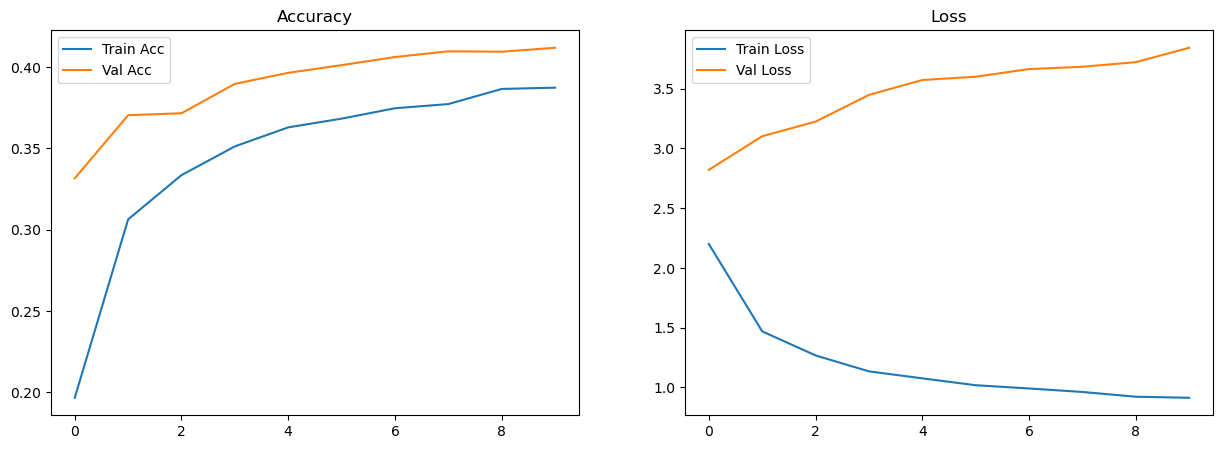

In [292]:
import matplotlib.pyplot as plt

def plot_model_history(history):
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    axs[0].plot(history.history['accuracy'], label='Train Acc')
    axs[0].plot(history.history['val_accuracy'], label='Val Acc')
    axs[0].set_title('Accuracy')
    axs[0].legend()

    axs[1].plot(history.history['loss'], label='Train Loss')
    axs[1].plot(history.history['val_loss'], label='Val Loss')
    axs[1].set_title('Loss')
    axs[1].legend()
    plt.show()

plot_model_history(history)


In [294]:
def prepare_image(img_path):
    from tensorflow.keras.preprocessing import image
    img = image.load_img(img_path, target_size=(img_size, img_size))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

class_labels = {v: k for k, v in train_generator.class_indices.items()}

def predict_image(img_path, model, class_labels, threshold=0.5):
    img_array = prepare_image(img_path)
    preds = model.predict(img_array)[0]
    top_indices = preds.argsort()[-3:][::-1]
    
    print("🔍 Top 3 Predictions:")
    for i in top_indices:
        print(f"{class_labels[i]}: {preds[i]*100:.2f}%")
    
    best_idx = top_indices[0]
    best_conf = preds[best_idx]
    best_label = class_labels[best_idx]

    if best_conf >= threshold:
        print(f"\n✅ Predicted Class: {best_label} ({best_conf*100:.2f}%)")
    else:
        print(f"\n❌ Model is unsure. Top prediction: {best_label} ({best_conf*100:.2f}%)")

# Example:
img_path = "C:/Users/nstib/Desktop/final Project 2025/PlantVillage/Potato___Early_blight/0a0744dc-8486-4fbb-a44b-4d63e6db6197___RS_Early.B 7575.JPG"
predict_image(img_path, model, class_labels)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 806ms/step
🔍 Top 3 Predictions:
Potato___Early_blight: 99.67%
Tomato_Septoria_leaf_spot: 0.14%
Pepper__bell___Bacterial_spot: 0.14%

✅ Predicted Class: Potato___Early_blight (99.67%)


In [296]:
base_model.trainable = True
model.compile(optimizer=Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_generator, validation_data=val_generator, epochs=5)


Epoch 1/5
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 937s 888ms/step - accuracy: 0.3285 - loss: 2.0225 - val_accuracy: 0.3036 - val_loss: 3.2751
Epoch 2/5
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 900s 871ms/step - accuracy: 0.5208 - loss: 1.1686 - val_accuracy: 0.2582 - val_loss: 3.3933
Epoch 3/5
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 909s 880ms/step - accuracy: 0.5357 - loss: 1.0555 - val_accuracy: 0.2501 - val_loss: 3.6238
Epoch 4/5
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 885s 857ms/step - accuracy: 0.5404 - loss: 0.9926 - val_accuracy: 0.2622 - val_loss: 4.0464
Epoch 5/5
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 885s 856ms/step - accuracy: 0.5530 - loss: 0.9418 - val_accuracy: 0.2610 - val_loss: 4.4748


In [312]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image

# --- Set path to the image you want to classify ---
img_path = "C:/Users/nstib/Desktop/final Project 2025/PlantVillage/Potato___Early_blight/0a0744dc-8486-4fbb-a44b-4d63e6db6197___RS_Early.B 7575.JPG"

# --- Dictionary: Suggested actions for each class ---
suggested_actions = {
    'Pepper__bell___Bacterial_spot': "Use copper-based bactericides; avoid overhead irrigation; remove infected leaves.",
    'Pepper__bell___healthy': "Plant looks healthy! Maintain good watering and nutrient practices.",
    'Potato___Early_blight': "Apply fungicides containing chlorothalonil; remove infected foliage.",
    'Potato___Late_blight': "Use fungicides such as chlorothalonil or mancozeb; remove infected plants promptly.",
    'Potato___healthy': "Plant is healthy; continue regular care.",
    'Tomato_Bacterial_spot': "Apply copper-based bactericides; remove infected leaves; avoid overhead watering.",
    'Tomato_Early_blight': "Use fungicides containing chlorothalonil; prune affected leaves.",
    'Tomato_Late_blight': "Apply fungicides promptly; ensure good field drainage.",
    'Tomato_Leaf_Mold': "Use fungicides; improve air circulation around plants.",
    'Tomato_Septoria_leaf_spot': "Apply fungicides like chlorothalonil; practice crop rotation.",
    'Tomato_Spider_mites_Two_spotted_spider_mite': "Use miticides; introduce predatory mites; maintain humidity.",
    'Tomato__Target_Spot': "Apply appropriate fungicides; remove infected leaves.",
    'Tomato__Tomato_YellowLeaf__Curl_Virus': "Remove infected plants; control whitefly vectors.",
    'Tomato__Tomato_mosaic_virus': "Remove infected plants; sanitize tools and hands regularly.",
    'Tomato_healthy': "Plant is healthy; continue regular care and monitoring."
}

# --- Reverse class indices ---
class_labels = {v: k for k, v in train_generator.class_indices.items()}

# --- Prediction function with suggested action ---
def predict_and_suggest_action(img_path, model, class_labels, suggested_actions, img_size=128, threshold=0.5):
    img = image.load_img(img_path, target_size=(img_size, img_size))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    preds = model.predict(img_array)[0]
    top_indices = preds.argsort()[-3:][::-1]
    
    print("🔍 Top 3 Predictions:")
    for i in top_indices:
        label = class_labels[i]
        print(f"{label}: {preds[i]*100:.2f}%")

    best_idx = top_indices[0]
    confidence = preds[best_idx]
    predicted_class = class_labels[best_idx]
    action = suggested_actions.get(predicted_class, "No suggestion available.")

    if confidence >= threshold:
        print(f"\n✅ Predicted Class: {predicted_class} ({confidence*100:.2f}%)")
        print(f"🧑‍🌾 Suggested Action: {action}")
    else:
        print(f"\n❌ Model is unsure. Top prediction: {predicted_class} ({confidence*100:.2f}%)")
        print(f"⚠️ Suggested Action: {action} (but verify manually)")


In [314]:
predict_and_suggest_action(img_path, model, class_labels, suggested_actions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step
🔍 Top 3 Predictions:
Potato___Early_blight: 99.97%
Pepper__bell___Bacterial_spot: 0.01%
PlantVillage: 0.01%

✅ Predicted Class: Potato___Early_blight (99.97%)
🧑‍🌾 Suggested Action: Apply fungicides containing chlorothalonil; remove infected foliage.
